<a href="https://colab.research.google.com/github/kamilllonly1/PianoFlow/blob/master/Lenet_mnist_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [14]:
import torchvision.datasets

In [15]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [16]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

In [17]:
len(y_train), len(y_test)

(60000, 10000)

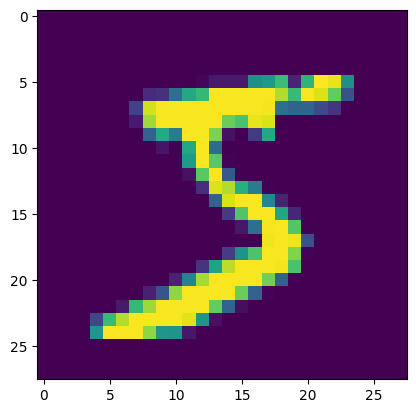

tensor(5)


In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [19]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [20]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [21]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv3 = torch.nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.act3  = torch.nn.ReLU()

        self.conv4 = torch.nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.act4  = torch.nn.ReLU()

        self.fc1   = torch.nn.Linear(64 * 5 * 5, 256)
        self.act5  = torch.nn.ReLU()

        self.fc2   = torch.nn.Linear(256, 128)
        self.act6  = torch.nn.ReLU()

        self.fc3   = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.act3(x)

        x = self.conv4(x)
        x = self.act4(x)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.act5(x)

        x = self.fc2(x)
        x = self.act6(x)
        x = self.fc3(x)

        return x

lenet5 = LeNet5()

In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [23]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [24]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(40):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9813)
tensor(0.9881)
tensor(0.9910)
tensor(0.9892)
tensor(0.9903)
tensor(0.9877)
tensor(0.9937)
tensor(0.9920)
tensor(0.9899)
tensor(0.9915)
tensor(0.9913)
tensor(0.9910)
tensor(0.9906)
tensor(0.9909)
tensor(0.9921)
tensor(0.9932)
tensor(0.9916)
tensor(0.9861)
tensor(0.9942)
tensor(0.9906)
tensor(0.9927)
tensor(0.9926)
tensor(0.9912)
tensor(0.9900)
tensor(0.9911)
tensor(0.9893)
tensor(0.9918)
tensor(0.9900)
tensor(0.9908)
tensor(0.9926)
tensor(0.9921)
tensor(0.9908)
tensor(0.9921)
tensor(0.9909)
tensor(0.9916)
tensor(0.9911)
tensor(0.9909)
tensor(0.9920)
tensor(0.9908)
tensor(0.9895)


In [25]:
lenet5.forward(X_test)

tensor([[ -75.7009,  -48.8617,  -26.5655,  ...,   43.2796,  -48.7640,
          -30.4131],
        [ -35.7610,  -54.7416,   32.1326,  ...,  -49.5349,  -52.8986,
          -97.3876],
        [ -53.0790,   40.1370,  -75.5141,  ...,  -48.7339,  -41.6853,
          -73.8167],
        ...,
        [ -95.5981,  -27.6568,  -49.6527,  ...,  -55.8995,  -40.0348,
          -41.7055],
        [ -48.8691,  -27.3033,  -41.7402,  ...,  -52.2101,  -26.0216,
          -30.6485],
        [ -30.4737,  -41.1433,  -43.0636,  ...,  -83.3880,  -35.7914,
         -106.9396]], device='cuda:0', grad_fn=<AddmmBackward0>)

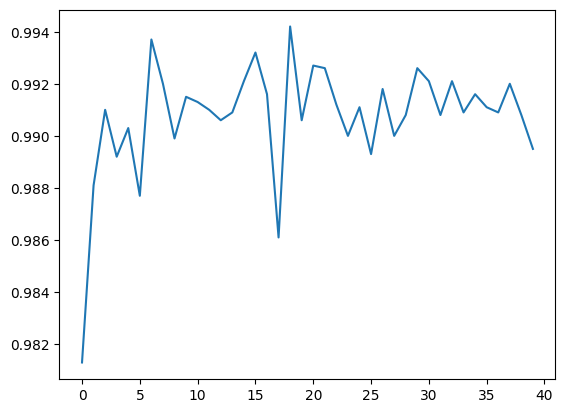

In [26]:
plt.plot(test_accuracy_history);

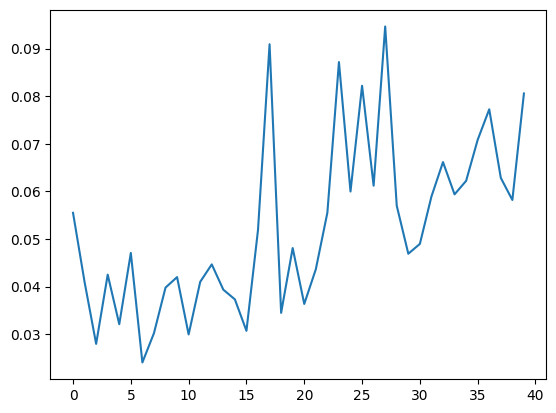

In [27]:
plt.plot(test_loss_history);